In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from pylab import rcParams

# Import Model Selection and Machine Learning Algorithms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 20, 15
sns.set_style('whitegrid')

In [4]:
derma = pd.read_csv('dermatology_database_1.csv')
derma.head(5)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [5]:
derma.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

In [6]:
derma.age = pd.to_numeric(derma.age, errors = 'coerce', downcast='integer')

In [7]:
derma.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [8]:
derma['age'].isna().sum()

8

In [9]:
derma = derma.fillna(derma['age'].mean())

In [10]:
derma['age'].isnull().sum()

0

In [11]:
X = derma.iloc[:,0:34]
y = derma.iloc[:,34]

In [12]:
y.value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

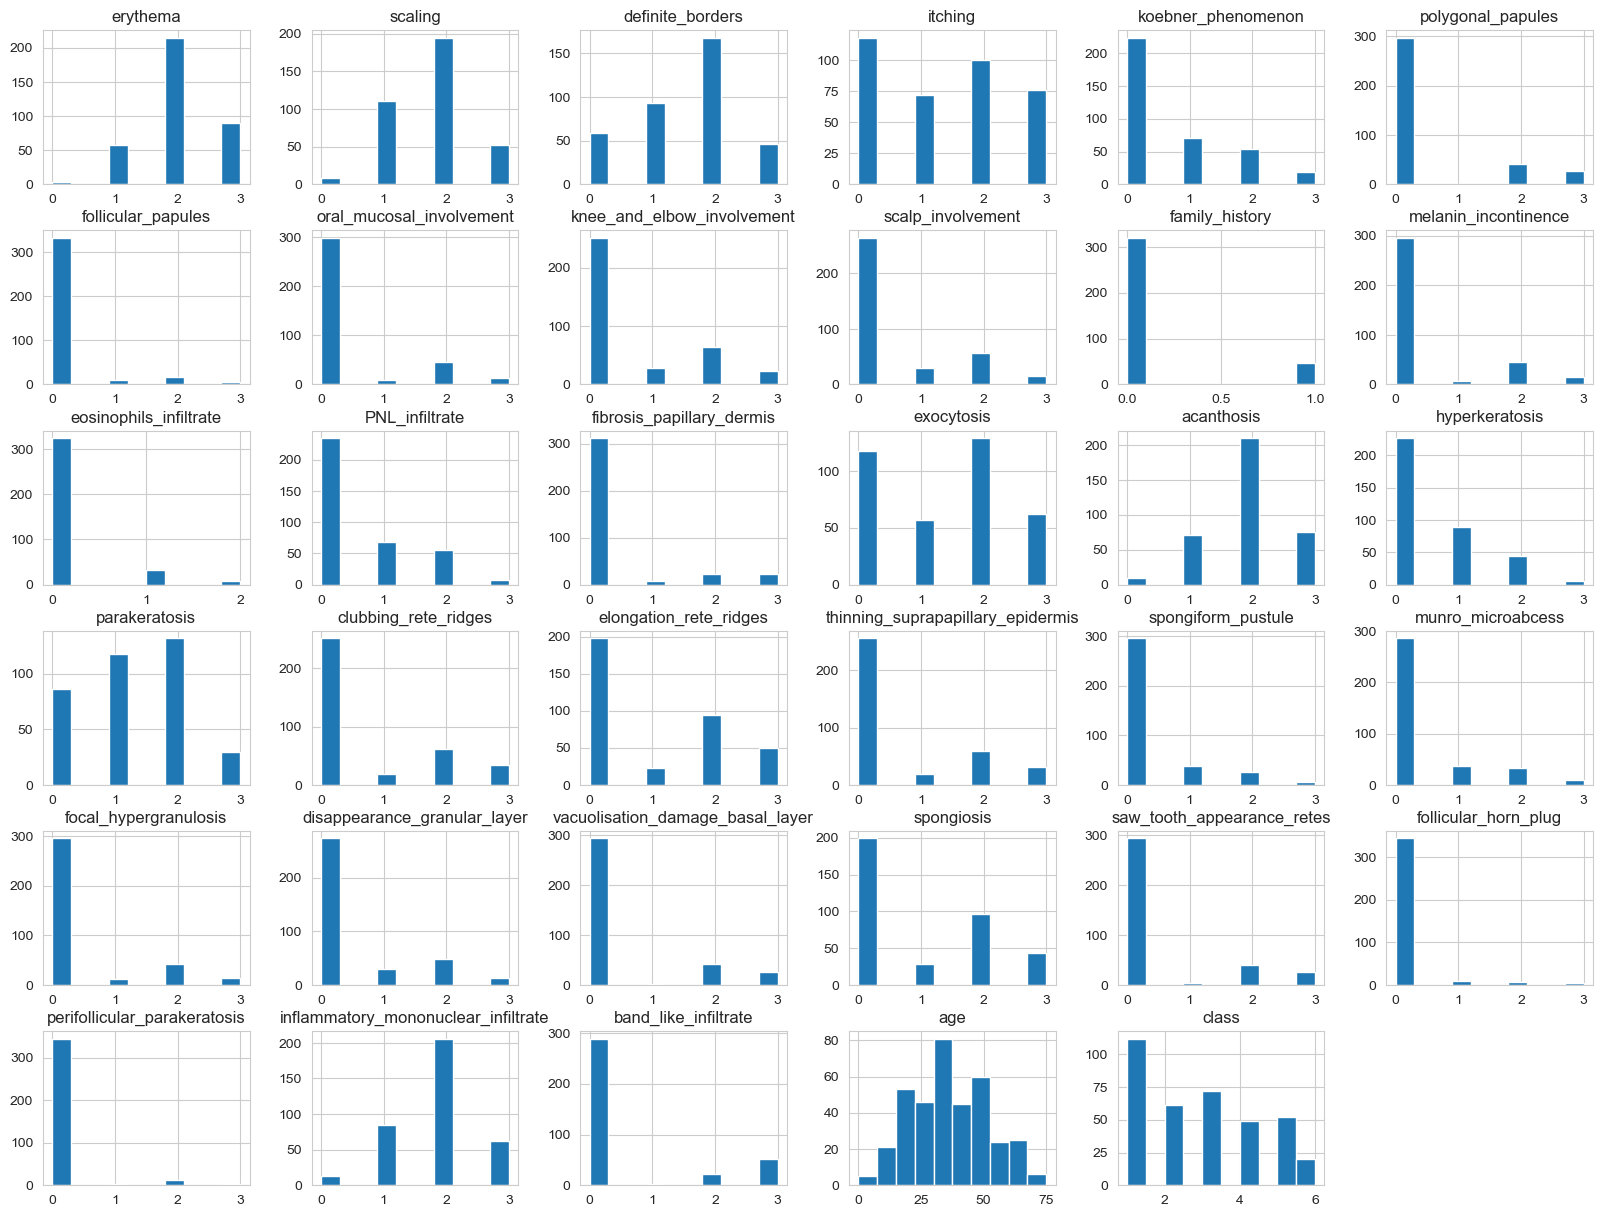

In [13]:
derma.hist(bins=10, figsize=(20, 15))
plt.show()

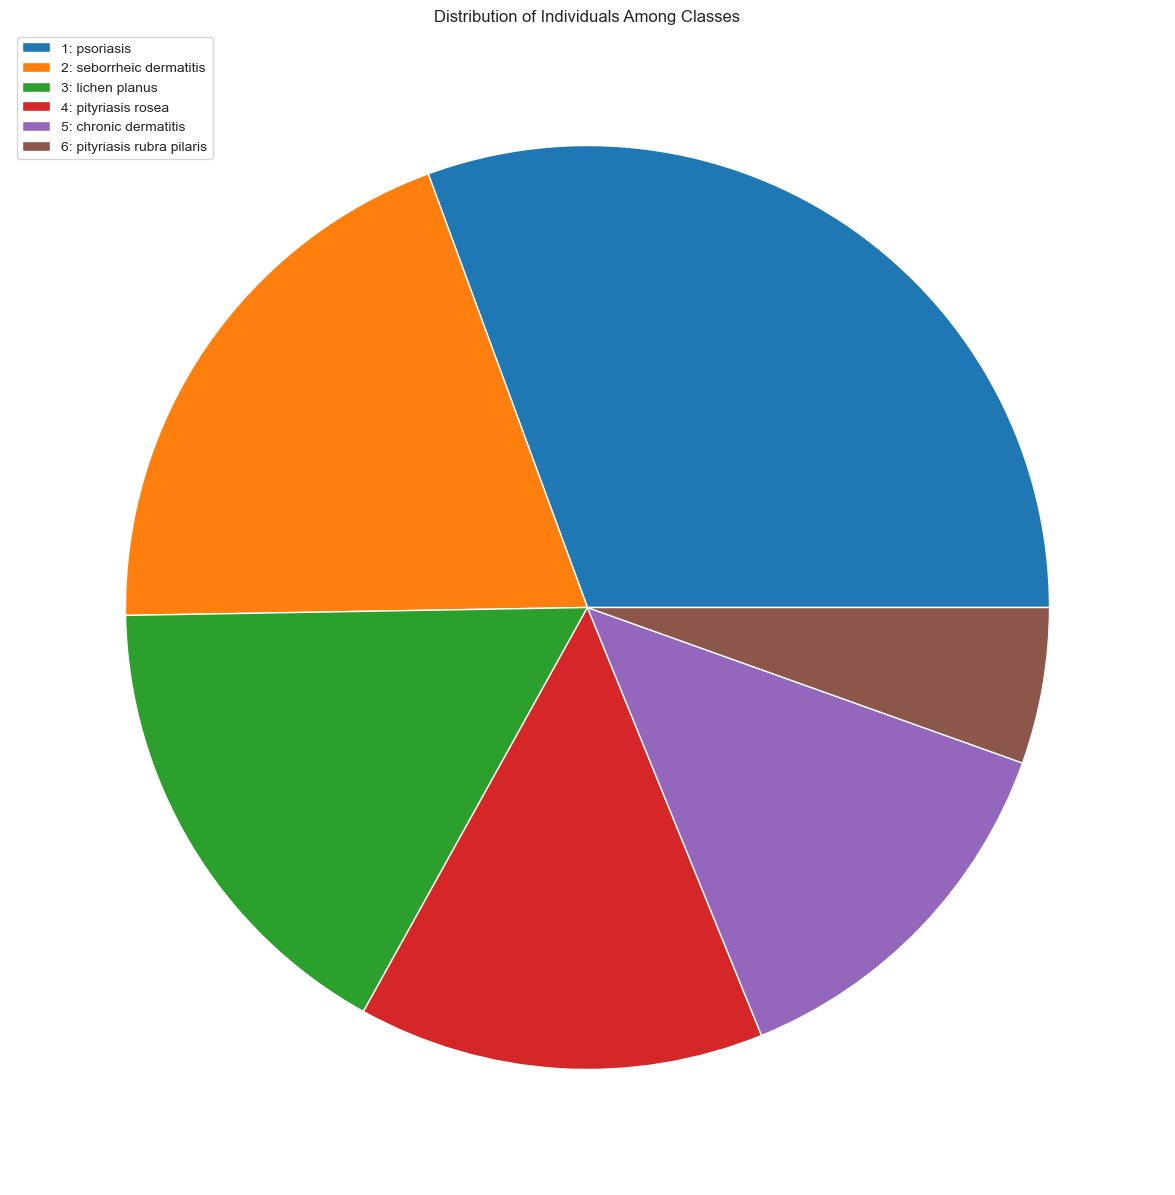

In [14]:
# Distribution of individuals among the classes
labels = ['1: psoriasis', '2: seborrheic dermatitis', '3: lichen planus', '4: pityriasis rosea', '5: chronic dermatitis', '6: pityriasis rubra pilaris']
plt.pie(derma['class'].value_counts())
plt.title('Distribution of Individuals Among Classes')
plt.legend(labels, loc='best')
plt.show()

In [15]:
corr = derma.corr(method='pearson')

<AxesSubplot:>

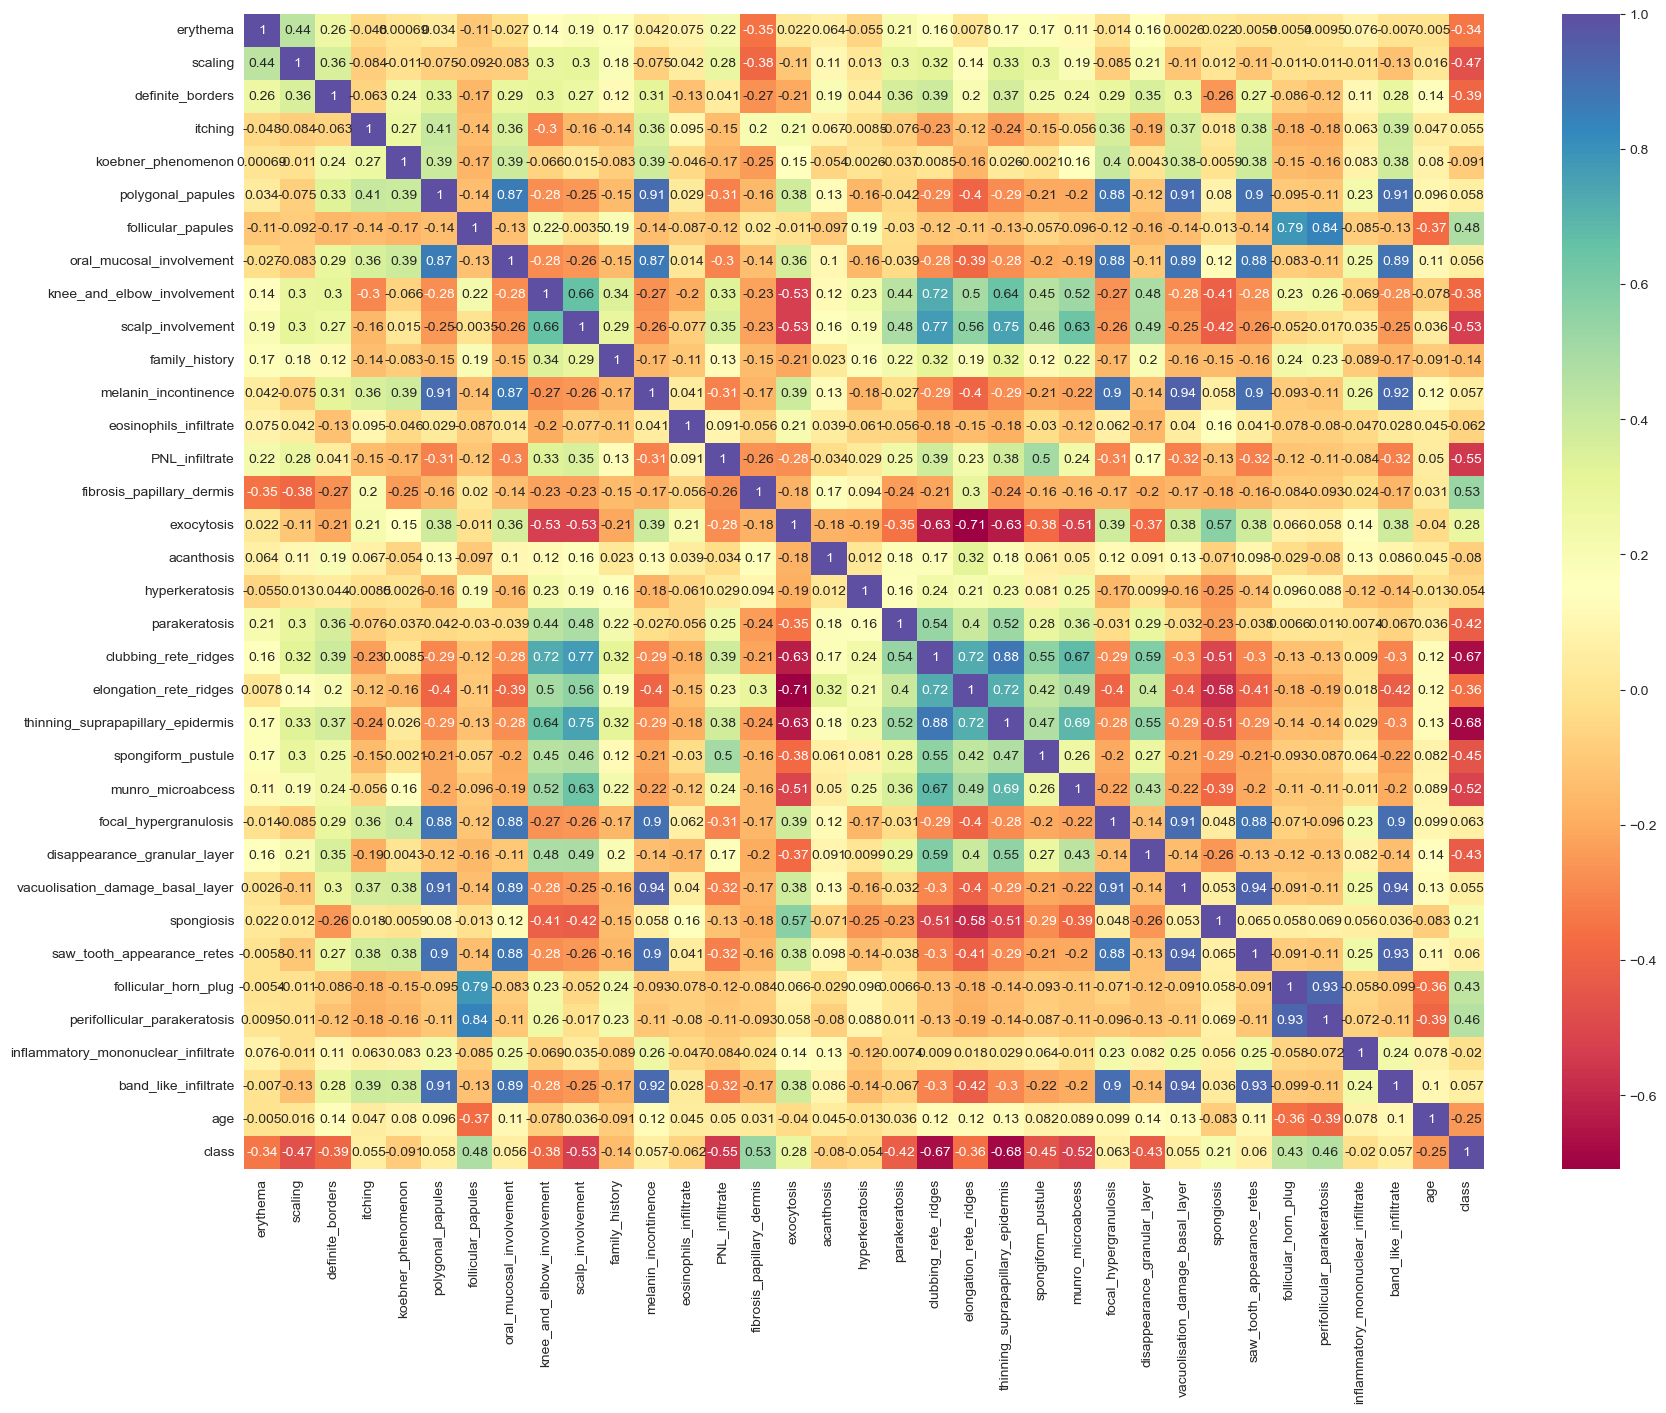

In [16]:
sns.heatmap(corr, cmap='Spectral', annot=True)


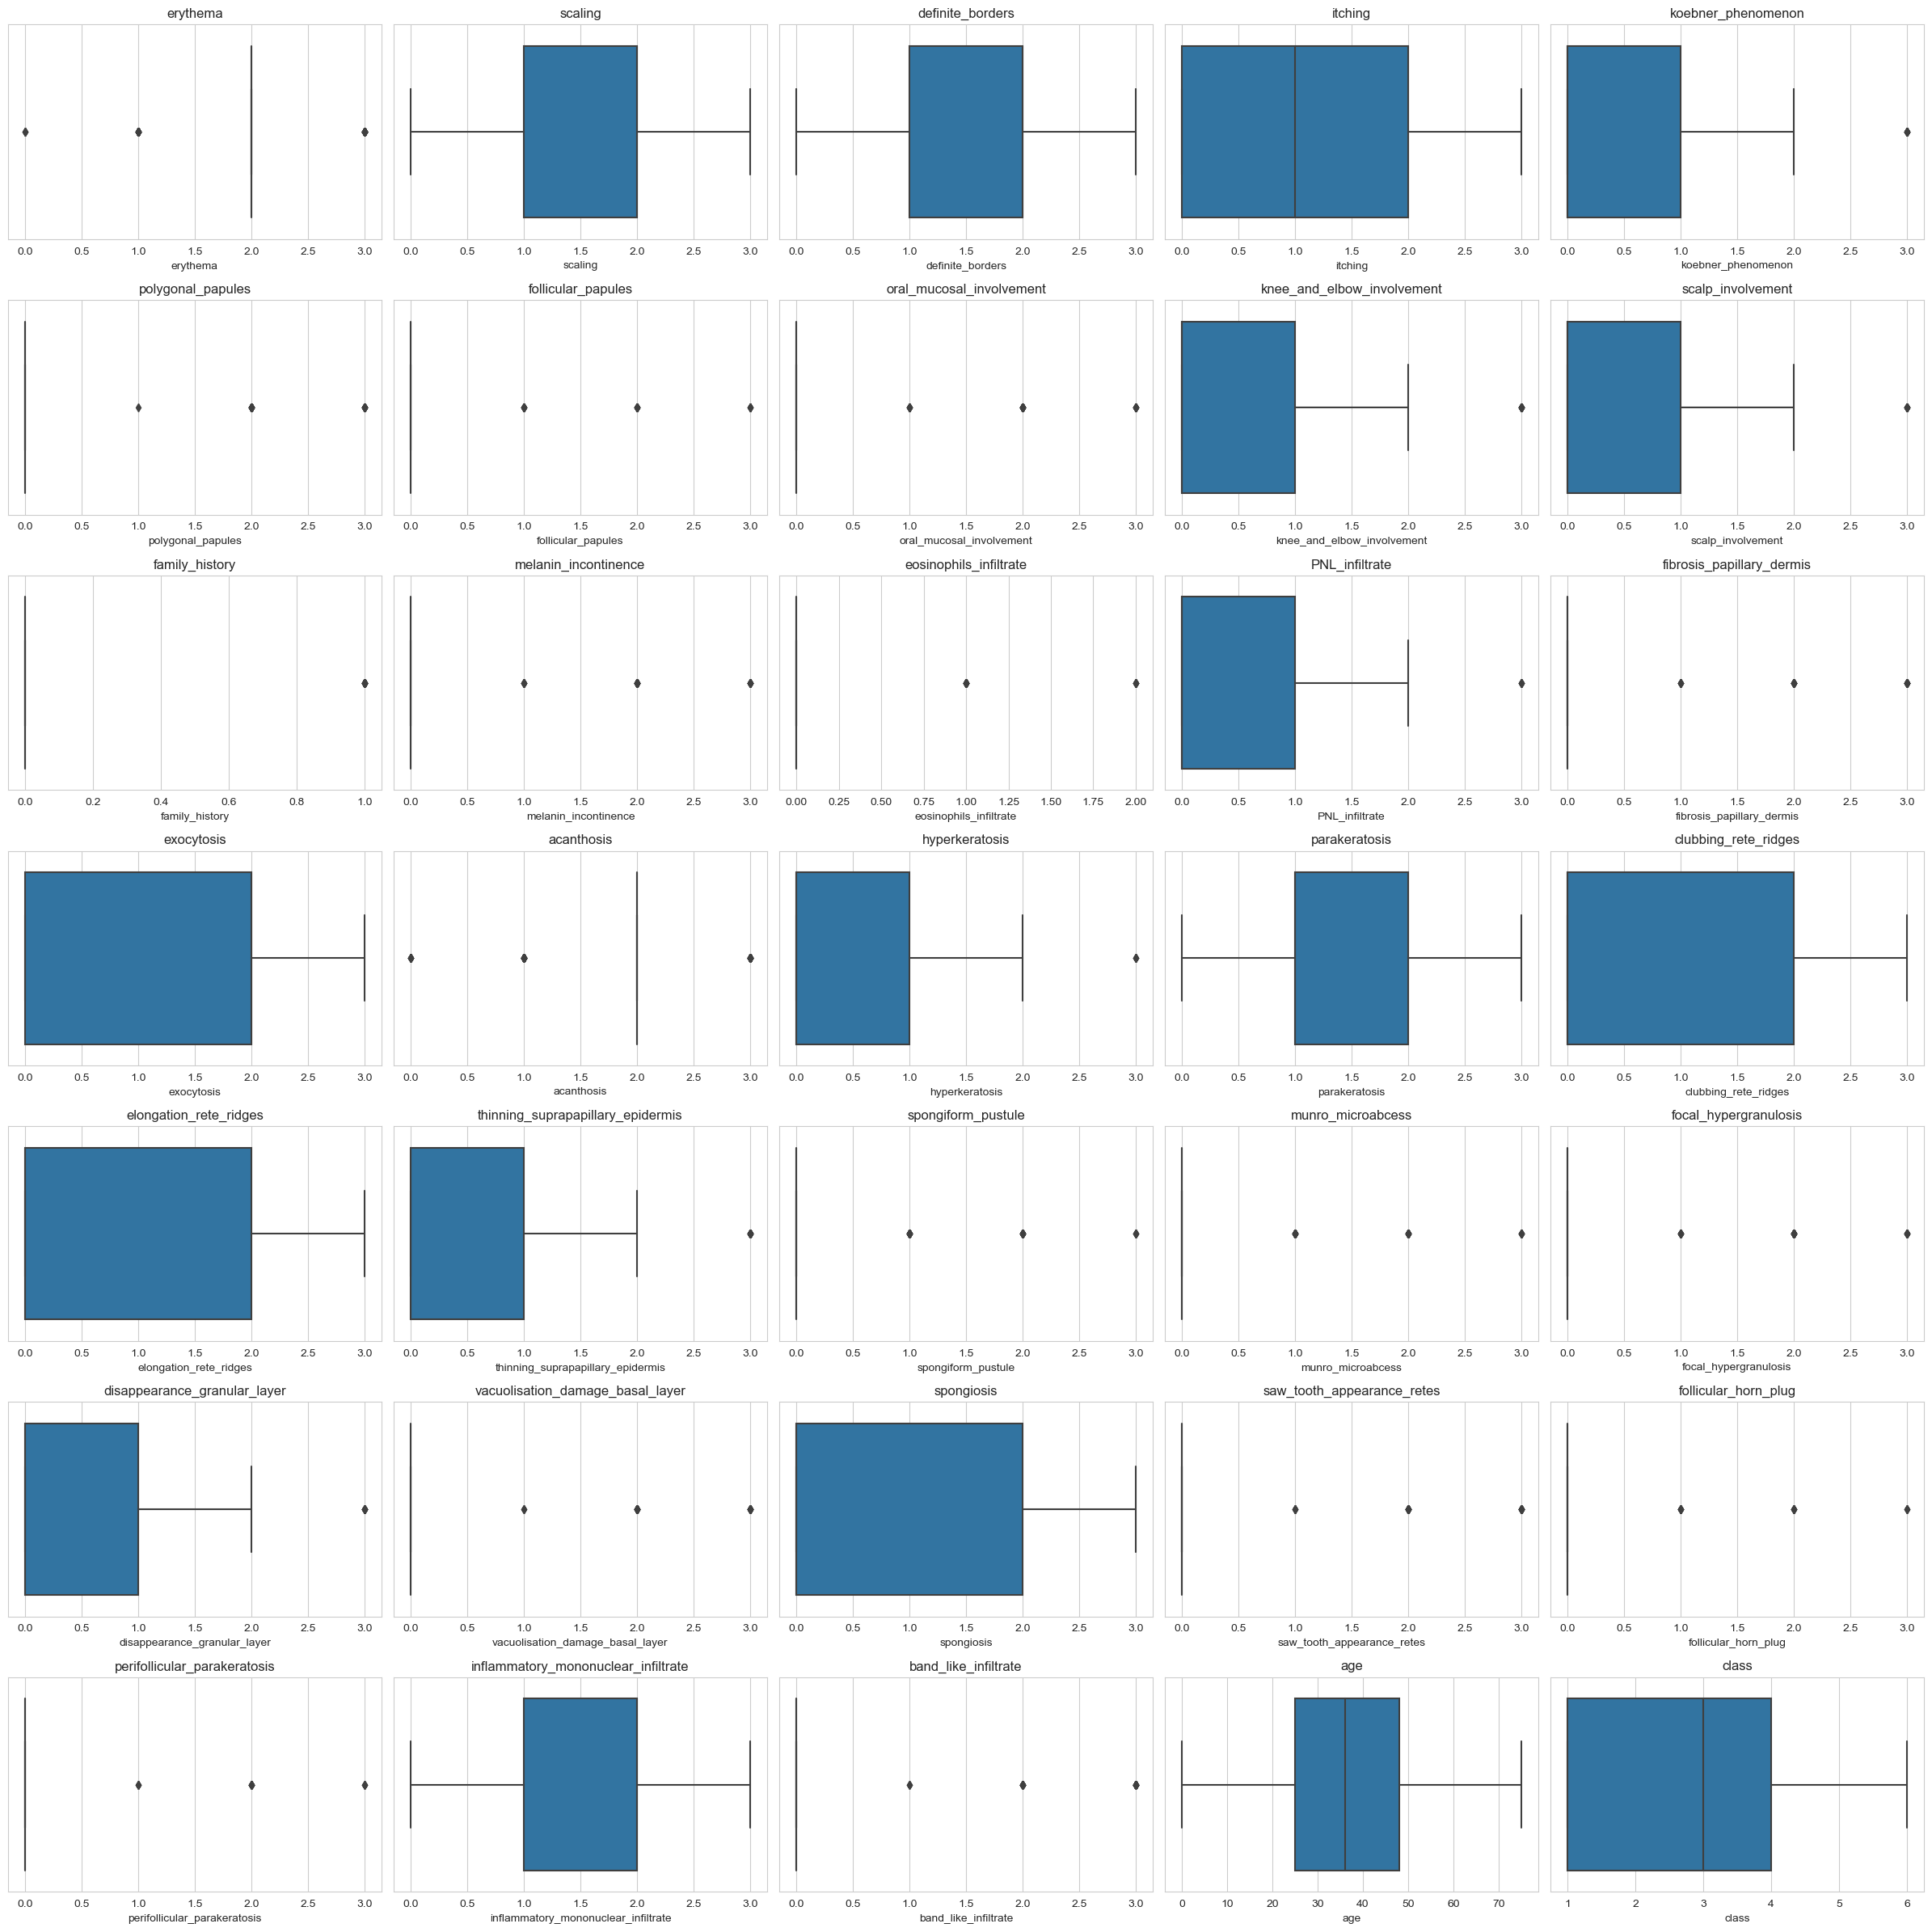

In [17]:
fig, axes = plt.subplots(nrows = 7, ncols = 5, figsize = (24,24))

for i, column in enumerate(derma.columns):
    row = i // 5
    col = i % 5
    sns.boxplot(x=derma[column], ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

In [18]:
# Encode Data for Modeling
ordinal = OrdinalEncoder()
label = LabelEncoder()

X_encoded = ordinal.fit_transform(X.loc[:, X.columns != 'age'])

y_encoded = label.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 33), (74, 33), (292,), (74,))

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [21]:
# Random Forest Classifier
rand_clf = RandomForestClassifier()

rand_clf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
y_pred = rand_clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)
print(classification_report(y_test, y_pred))

Accuracy:  0.9864864864864865
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [23]:
# Gradient Boosting Classifier
gboost = GradientBoostingClassifier()

gboost.fit(x_train, y_train)

GradientBoostingClassifier()

In [24]:
y_p = gboost.predict(x_test)

acc = accuracy_score(y_test, y_p)
print('Accuracy: ', acc)
print(classification_report(y_test, y_p))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



In [25]:
# Voting Classifier
voting = VotingClassifier(estimators=[
        ('RF', rand_clf), ('GB', gboost)], voting='hard')

voting.fit(x_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('GB', GradientBoostingClassifier())])

In [26]:
pred = voting.predict(x_test)

AS = accuracy_score(y_test, pred)
print('Accuracy: ', AS)
print(classification_report(y_test, pred))

Accuracy:  0.9864864864864865
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00        13
           3       1.00      0.88      0.93         8
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



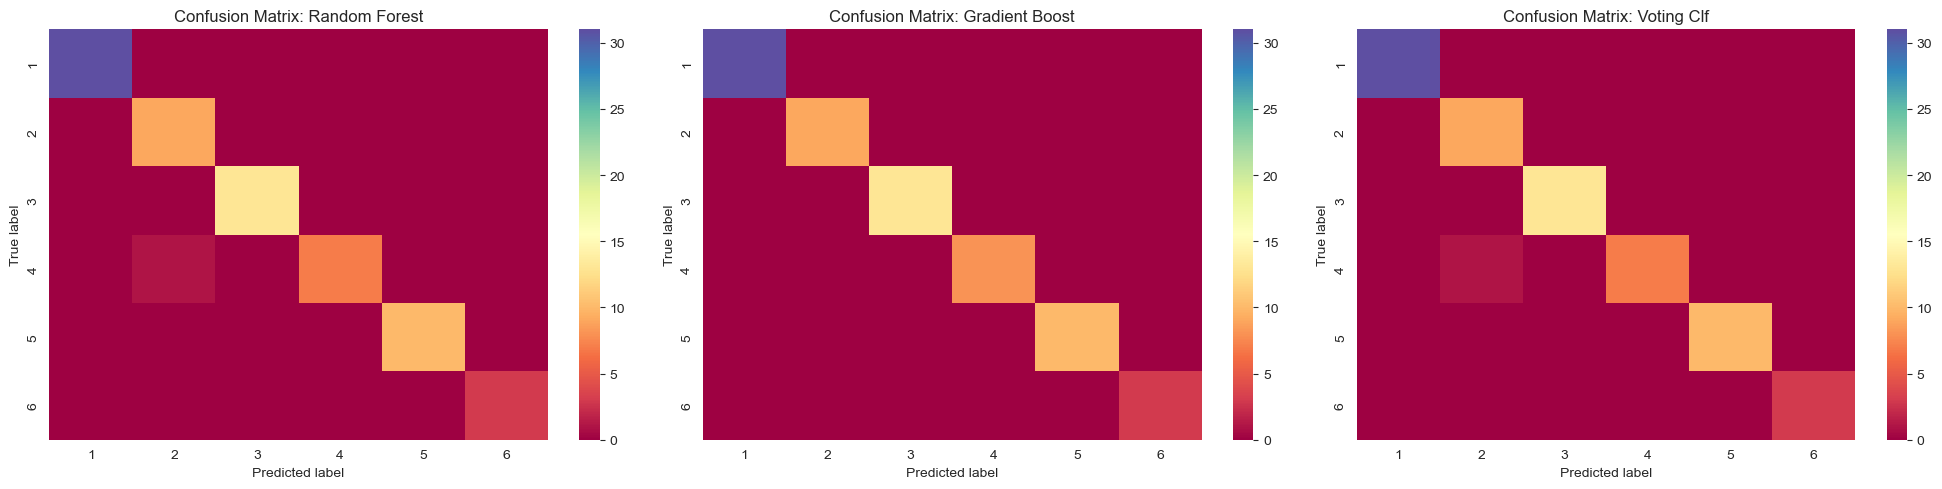

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))

cf1 = sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Spectral', ax = ax1, xticklabels=np.unique(y), yticklabels=np.unique(y))
cf1.set_title('Confusion Matrix: Random Forest')
cf1.set_xlabel('Predicted label')
cf1.set_ylabel('True label')

cf2 = sns.heatmap(confusion_matrix(y_test, y_p), cmap='Spectral', ax = ax2, xticklabels=np.unique(y), yticklabels=np.unique(y))
cf2.set_title('Confusion Matrix: Gradient Boost')
cf2.set_xlabel('Predicted label')
cf2.set_ylabel('True label')

cf3 = sns.heatmap(confusion_matrix(y_test, pred), cmap='Spectral', ax = ax3, xticklabels=np.unique(y), yticklabels=np.unique(y))
cf3.set_title('Confusion Matrix: Voting Clf')
cf3.set_xlabel('Predicted label')
cf3.set_ylabel('True label')

plt.tight_layout()
plt.show()